# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto (Sprint 14 Series Temporales)

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.
4. La métrica RECM en el conjunto de prueba **no debe ser superior a 48**.

## Descripción de los datos

* Los datos se almacenan en el archivo `taxi.csv`. 	
* El número de pedidos está en la columna `num_orders`.

## Preparación

### Carga de librerias necesarias.

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Carga de informacion

In [2]:
data = pd.read_csv(
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/taxi.csv?etag=11687de0e23962e5a11c9d8ae13eb630',
    index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()


In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La preparación de los datos está bien estructurada. Has cargado las librerías necesarias, aplicado el remuestreo correctamente y ordenado los datos en función del índice temporal. Esto es un paso clave para un análisis preciso de series temporales.  
</div>

## Análisis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


<AxesSubplot:xlabel='datetime'>

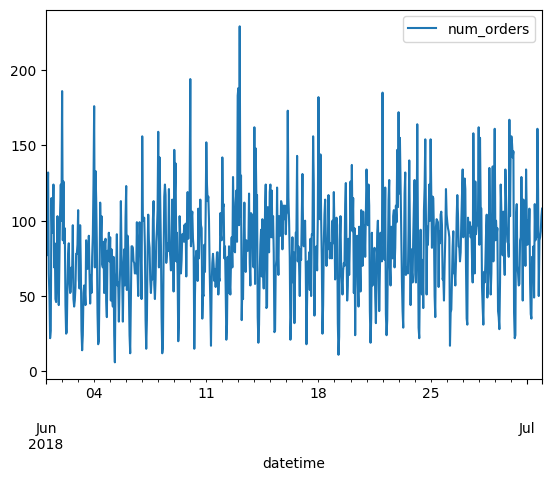

In [5]:
#data.plot()
# Graficando solo un rango para mejor visualizacion
data['2018-06-01':'2018-07-01'].plot()

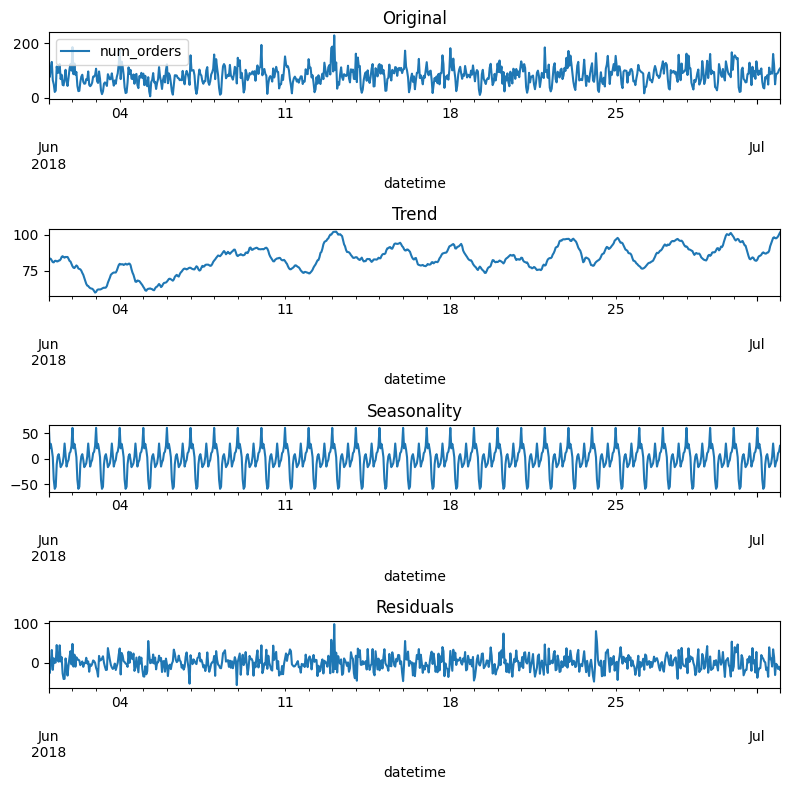

In [6]:
decomposed = seasonal_decompose(data)

# Graficando solo un rango para mejor visualizacion

plt.figure(figsize=(8, 8))

plt.subplot(411)
# Para mostrar el gráfico de manera correcta, especifica su
# eje ax igual a plt.gca() (gca = obtener el eje actual)
data['2018-06-01':'2018-07-01'].plot(ax=plt.gca())
plt.title('Original')

plt.subplot(412)
# Para mostrar el gráfico de manera correcta, especifica su
# eje ax igual a plt.gca() (gca = obtener el eje actual)
decomposed.trend['2018-06-01':'2018-07-01'].plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(413)
decomposed.seasonal['2018-06-01':'2018-07-01'].plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(414)
decomposed.resid['2018-06-01':'2018-07-01'].plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

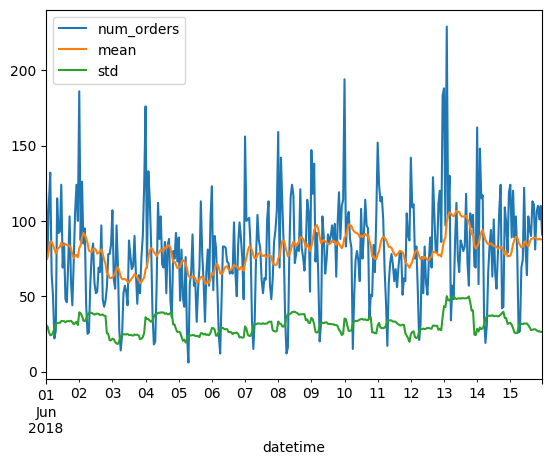

In [7]:
data_t = data.copy()
data_t['mean'] = data_t['num_orders'].rolling(20).mean()
data_t['std'] = data_t['num_orders'].rolling(20).std()

# Graficando solo un rango para mejor visualizacion
data_t['2018-06-01':'2018-06-15'].plot()

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La exploración de la serie temporal está bien realizada. Has descompuesto correctamente la serie en tendencia, estacionalidad y residuos, lo que es clave para entender su comportamiento y tomar decisiones informadas sobre la modelización.  
</div>

<div class="alert alert-block alert-info"> <b>Duda del estudiante.</b> 
    De momento la siguiente grafica está buscando solo para visualizar la data con la diferencia de series, sin embargo se tiene la duda de si es correcto manejar todo el ejercicio habiendo encontrado la diferencia de la serie y establecer dichos valores como target o por el contrario manejar esta diferencia como una caracteristica adicional conservando la data original?
    
Se recomienda algun uso de las diferencias de la serie?
</div>

<AxesSubplot:xlabel='datetime'>

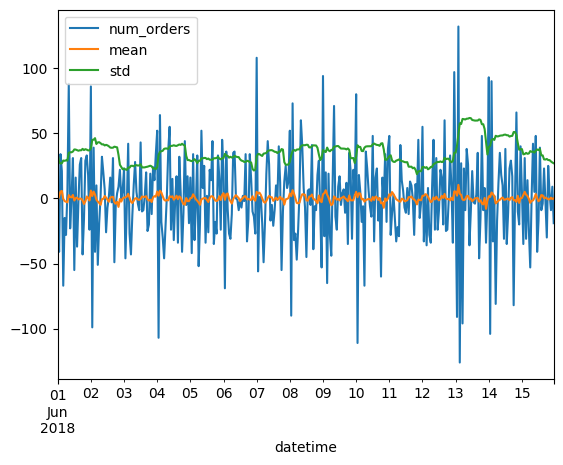

In [8]:
data_t -= data_t.shift()
data_t['mean'] = data_t['num_orders'].rolling(20).mean()
data_t['std'] = data_t['num_orders'].rolling(20).std()
data_t['2018-06-01':'2018-06-15'].plot()

<div class="alert alert-block alert-info">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
La diferenciación de la serie es útil para hacerla estacionaria y puede ser usada como target si el modelo predice cambios en lugar de valores absolutos. Sin embargo, en problemas de predicción de series temporales, es común usar la serie original y tratar la diferencia como una característica adicional, ya que ayuda a capturar tendencias y variaciones sin perder la escala original de los datos. Si decides diferenciar la serie, recuerda que al hacer la predicción necesitarás revertir la transformación para interpretar correctamente los resultados.  
</div>

### Comentarios

- Se tiene informacion de las ordenes realizadas desde marzo hasta agosto del 2018 (6 meses)
- Se realizó un resample localizando la informacion acumulada por hora.
- Se logró identificar que se tiene una tendencia relativamente estable hacia la alza con una estacionalidad aproximadamente de un dia (es una serie estacionaria)

## Formación

### Definicion de funciones

In [9]:
def make_features(data, target, max_lag, rolling_mean_size):
    # Caracteristicas de calendario
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    # Caracteristicas de defase
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[target].shift(lag)

    # Media Movil
    data['rolling_mean'] = (
        # Se está considerando descartar el valor actual de la serie
        data[target].shift().rolling(rolling_mean_size).mean()
    )
    
    # Diferencia de serie
    #data['diff'] = data[target]-data[target].shift()
    
    # Se mantiene la serie libre de valores ausentes
    data = data.dropna()
    print(f"Size: {data.shape}")
    return data

### Creación de caracteristicas

In [12]:
data_t = make_features(data.copy(), "num_orders", 12, 6)

Size: (4404, 19)


In [13]:
display(data_t.head())

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,
2018-03-01 12:00:00,30,2018,3,1,3,12,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,48.333333
2018-03-01 13:00:00,32,2018,3,1,3,13,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,51.333333
2018-03-01 14:00:00,48,2018,3,1,3,14,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,54.166667
2018-03-01 15:00:00,66,2018,3,1,3,15,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,56.500000
2018-03-01 16:00:00,43,2018,3,1,3,16,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,56.000000


### Division de los datos para el entrenamiento

In [14]:
features_train, features_valid, target_train, target_valid = train_test_split(
    data_t.drop('num_orders', axis=1), 
    data_t.num_orders, 
    shuffle=False,
    test_size=0.1
)

In [15]:
print(
    features_train.shape, features_valid.shape, target_train.shape, target_valid.shape
)

(3963, 18) (441, 18) (3963,) (441,)


### Definicion de modelos

In [17]:
# Se define los modelos a probar
models = {
    'LinearRegression': LinearRegression(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
}

# Se definen los parametros a probar de cada modelo
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False],
    },
    'ExtraTreesRegressor': {
        'n_estimators': [70, 100, 130, 160],
        'max_depth': [12, 24, None],
        'bootstrap': [True, False],
        'warm_start': [True, False],
    },
    'RandomForestRegressor': {
        'n_estimators': [70, 100, 130, 160],
        'max_depth': [12, 24, None],
        'bootstrap': [True, False],
        'warm_start': [True, False],
    }
}

### Eleccion de modelos

In [18]:
%%time

# Variables para almacenar los mejores resultados
best_scores = {}
best_params = {}
folds = 5


for model_name, model in models.items():
    print()
    print(f"Tunning for {model_name}...")
    param_grid = param_grids[model_name]
    
    grid_cv_model = GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
    #fiting 
    grid_cv_model.fit(features_train,target_train)
    

    # Se almacenan los mejores reslutados
    best_scores[model_name] = grid_cv_model.best_score_
    best_params[model_name] = grid_cv_model.best_params_



Tunning for LinearRegression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Tunning for ExtraTreesRegressor...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Tunning for RandomForestRegressor...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 15min 36s, sys: 4.13 s, total: 15min 41s
Wall time: 15min 46s


In [19]:
print(f"Best Scores: {best_scores}")
print()
print(f"Best Params: {best_params}")


Best Scores: {'LinearRegression': -23.54183772334203, 'ExtraTreesRegressor': -17.8232773228216, 'RandomForestRegressor': -18.25617429473987}

Best Params: {'LinearRegression': {'fit_intercept': True}, 'ExtraTreesRegressor': {'bootstrap': False, 'max_depth': 24, 'n_estimators': 100, 'warm_start': False}, 'RandomForestRegressor': {'bootstrap': True, 'max_depth': None, 'n_estimators': 70, 'warm_start': False}}


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La ingeniería de características y la selección de modelos están bien estructuradas. Has incorporado características temporales clave, defasajes y medias móviles de manera efectiva. Además, el uso de `GridSearchCV` para optimizar los hiperparámetros de múltiples modelos es una excelente práctica para mejorar el rendimiento del modelo.  
</div>

## Prueba

In [21]:
class MyMetrics:
    def __init__(self):
        self.scores = pd.DataFrame(columns = ["model", "mse", "rmse", "r2_score"])
        return 

    def collect_metrics(self, model_name, target_valid, target_pred):
        # Getting mean squared error from the model
        mse=mean_squared_error(target_valid, target_pred)
        data = {
            "model": model_name,
            "mse": mse,
            "rmse": mse**0.5,
            "r2_score": r2_score(target_valid, target_pred)
        }
        self.scores = self.scores.append(data, ignore_index=True)
        self.scores.drop_duplicates(inplace=True)
        self.display_metrics(model_name, target_valid, target_pred)
        return 
    
    def display_metrics(self, model_name, target_valid, target_pred):
        # Getting mean squared error from the model
        # The coefficient of determination: 1 is perfect prediction
        mse=mean_squared_error(target_valid, target_pred)
        
        print()
        print(model_name)
        print(f"Mean squared error= {mse:.2f}, RMSE= {mse**0.5:.2f} Coefficient of determination: %.2f" % r2_score(target_valid, target_pred))
        return 

### Entrenamiento y Recoleccion de Metricas

In [22]:
my_metrics = MyMetrics()

for model_name, model in models.items():
    params = best_params[model_name]
    
    model = models[model_name]
    model = model.set_params(**params)
    
    #fiting 
    model.fit(features_train,target_train)
    #get predictions
    target_preds = model.predict(features_valid)

    my_metrics.collect_metrics(model_name, target_valid, target_preds)


LinearRegression
Mean squared error= 2757.47, RMSE= 52.51 Coefficient of determination: 0.20

ExtraTreesRegressor
Mean squared error= 1879.33, RMSE= 43.35 Coefficient of determination: 0.45

RandomForestRegressor
Mean squared error= 1895.73, RMSE= 43.54 Coefficient of determination: 0.45


In [23]:
display(my_metrics.scores.sort_values(by=['model', 'rmse']))

,model,mse,rmse,r2_score
1,ExtraTreesRegressor,1879.329103,43.351230,0.452510
0,LinearRegression,2757.472488,52.511641,0.196687
2,RandomForestRegressor,1895.728636,43.539966,0.447732


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La implementación de la clase `MyMetrics` para evaluar los modelos es una excelente práctica. Permite organizar las métricas de manera estructurada y facilita la comparación del rendimiento de los modelos. Además, la integración con `GridSearchCV` garantiza que los mejores hiperparámetros sean utilizados en la evaluación final.  
</div>

## Conslusiones

Siguiendo las pistas y requerimientos del ejercicio, se realizaron las siguientes acciones:

1. Se crearon caracteristicas tanto de calendario como de fase. En esta seccion se trabajó creando caracteristicas basicas, sin embargo se identificó agregar la caracteristica de la "hora" debido a que a raiz del analisis se detecta que la estacionalidad es diaria.

<div class="alert alert-block alert-info">
    Se realizaron pruebas con la caracteristica de "diferencia de serie" (comentado en codigo) para tratar de resolver la pregunta en secciones anteriores. Se obtuvieron resultados sospechozos:


RMSE= 0.01 Coefficient of determination: 1
    
Al momento se asume que esto es inadecuado y que se debe descartar el uso de esta caracteristica pues indica basicamente el target sin embargo me quedo pendiente de comentarios por parte del revisor.
</div>

2. Se trabajaron con varios Algoritmos y se definieron hiperparametros para cada uno de ellos partiendo de la regresion lineal y la meta a cumplir con las metricas.

    A partir de un GridSearch se seleccionaron los siguientes hiperparametros para obtener las mejores metricas:

<pre>
Best Scores: 
{
    'LinearRegression': -23.54183772334203, 
    <b>'ExtraTreesRegressor': -17.8232773228216, </b>
    'RandomForestRegressor': -18.25617429473987
}

Best Params: 
{
    'LinearRegression': {'fit_intercept': True}, 
    <b>'ExtraTreesRegressor': {'bootstrap': False, 'max_depth': 24, 'n_estimators': 100, 'warm_start': False}, </b>
    'RandomForestRegressor': {'bootstrap': True, 'max_depth': None, 'n_estimators': 70, 'warm_start': False}
}
</pre>
Con lo anterior usando el algoritmo ExtraTreesRegressor se obtuvo un rmse de <b>43.351230</b> para el set de pruebas.

Finalmente, queda en evidencia que es importante analizar la serie y sus caracteristicas para seleccionar un mejor establecimiento de caracteristicas y con ello obtener los mejores resultados.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Has logrado una evaluación estructurada y clara del rendimiento de los modelos. La recolección de métricas en un DataFrame permite una comparación eficiente entre las distintas configuraciones probadas, lo que es fundamental para seleccionar el mejor modelo.  
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48

# Comentario general del revisor 

 
<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades Mauricio! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, desde la preparación hasta la evaluación de modelos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:  

**Puntos Positivos:**
    
- **Procesamiento de datos:** Has realizado un preprocesamiento correcto, incluyendo remuestreo y creación de características relevantes.  
- **Análisis exploratorio:** Descomposición de la serie temporal bien implementada, permitiendo una mejor comprensión de tendencias y estacionalidad.  
- **Ingeniería de características:** La función `make_features` incorpora aspectos clave como lags y medias móviles, fortaleciendo el modelo.  
- **Optimización de modelos:** Has utilizado `GridSearchCV` para encontrar los mejores hiperparámetros, lo que demuestra un enfoque riguroso en la selección del modelo.  
- **Evaluación estructurada:** La implementación de `MyMetrics` facilita la comparación de modelos y la organización de los resultados.  

    
**Áreas para Seguir Investigando:**  
- **Técnicas avanzadas de feature engineering:** Explorar transformaciones como diferencias de series o características basadas en ventanas de tiempo más complejas.  
- **Optimización de modelos más complejos:** Considerar modelos más avanzados como `XGBoost` o `LSTM` para series temporales.  
- **Manejo de datos desbalanceados:** Si en futuros proyectos la serie muestra alta variabilidad en ciertos períodos, podrías aplicar técnicas como SMOTE o resampling estratégico.  
- **Evaluación con datos futuros:** Implementar un esquema de validación temporal, como `TimeSeriesSplit`, para simular condiciones reales de predicción.  

¡Sigue así, estás haciendo un gran trabajo!  
</div>  